Objectives
1. To provide legal literacy to the general public of India.
2. To provide basic legal support for filing cases to the common folks of India.
3. To provide source verification and resources for all the responses the system provides and enhance user trust.
4. To ensure consumer data is protected and masked.

In [ ]:
# Create the folder structure for all four legal acts
!mkdir /content/divorce
!mkdir /content/copyright
!mkdir /content/consumer_protection
!mkdir /content/inheritance

In [ ]:
# installing all necessary packages
%pip install transformers
%pip install datasets
%pip install huggingface_hub
%pip install torch

%pip install llama-index
%pip install llama-index-core
%pip install llama-index-embeddings-huggingface
%pip install llama-index-readers-file
%pip install transformers accelerate bitsandbytes
%pip install llama-index-readers-web
%pip install --upgrade --quiet llama-index-llms-nvidia llama-index-embeddings-nvidia llama-index-readers-file
%pip install "transformers[torch]" "huggingface_hub[inference]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Importing necessary packages
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
import torch
from transformers import DataCollatorWithPadding, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

from llama_index.core import Settings
from llama_index.core import Document
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.ingestion import IngestionPipeline

import logging
import sys
import os
import getpass
from IPython.display import Markdown, display
from llama_index.core import (
    SimpleDirectoryReader,
    StorageContext,
    VectorStoreIndex,
)
from llama_index.core.settings import Settings
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.retrievers import QueryFusionRetriever
from llama_index.core.response.notebook_utils import display_response
from typing import List, Optional
from llama_index.llms.nvidia import NVIDIA
from llama_index.core.evaluation import FaithfulnessEvaluator, RelevancyEvaluator
import nest_asyncio

In [ ]:
# del os.environ['NVIDIA_API_KEY']  ## delete key and reset
if os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    print("Valid NVIDIA_API_KEY already in environment. Delete to reset")
else:
    nvapi_key = getpass.getpass("NVAPI Key (starts with nvapi-): ")
    assert nvapi_key.startswith(
        "nvapi-"
    ), f"{nvapi_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvapi_key

NVAPI Key (starts with nvapi-): ··········


In [ ]:
nest_asyncio.apply()

In [ ]:
llm = NVIDIA(llm = "deepseek-ai/deepseek-r1")
evaluation_llm = NVIDIA()

In [ ]:
# downloading the embedding model with the HuggingFace token
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Global settings for the LLM and embedding model
Settings.llm = llm
Settings.embed_model = embed_model

## Overall architecture and intent recognition

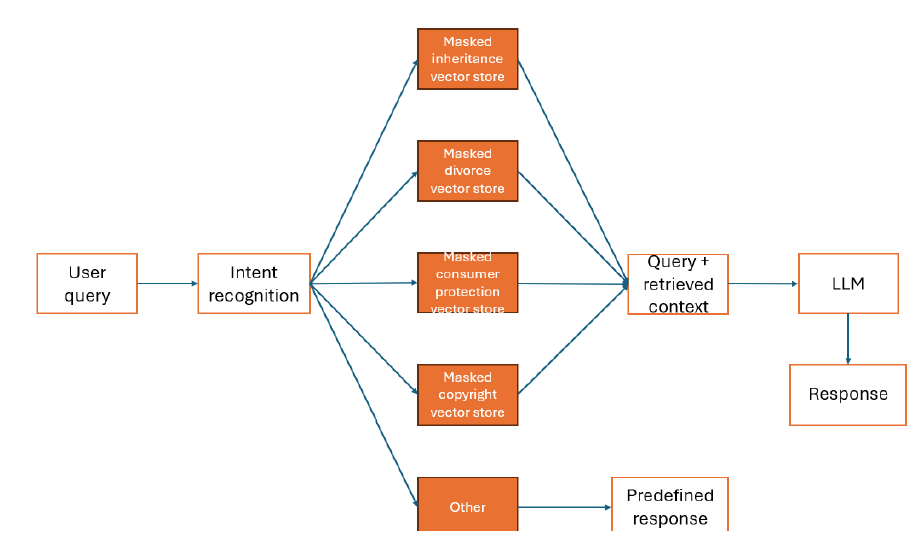

In [ ]:
# intent and labels dict
intent_label_dict = {0: 'Divorce', 1: 'Consumer protection',2: 'Inheritance', 3: 'Copyright', 4: 'Other'}
# data and model save path
intent_data_path = '/content/intent_classification_train.xlsx'
model_path = "Sachin891/LegalRAG-intent-classification-distilbert"

In [ ]:
# reading the training data for intent classification
intent_data = pd.read_excel(intent_data_path)
intent_data.head()

,Intent,Query
0,Divorce,How to get divorce?
1,Divorce,What to do to get alimony in divorce?
2,Divorce,What are the grounds for divorce?
3,Divorce,How long does the divorce process take?
4,Divorce,Can I file for divorce online?


In [ ]:
# Showing all the intents and the number of records
intent_data['Intent'].value_counts()

,count
Intent,
Divorce,50
Inheritance,50
Copyright,50
Other,50
Consumer protection,49


In [ ]:
# Function to calculate the metrics for intent classification
def compute_metrics(p):
    # Extract the predictions
    preds = p.predictions.argmax(-1)  # Get the index of the maximum logit value for each example
    labels = p.label_ids

    # Compute accuracy
    accuracy = accuracy_score(labels, preds)

    # Compute precision, recall, f1 for each class (weighted average)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [ ]:
# Function to train the intent classification model using distilBERT and tokenizer
def intent_classification_train(path):
  # Load your dataset
  df = pd.read_excel(path)

  df.replace({'Divorce':0, 'Consumer protection':1, 'Inheritance':2, 'Copyright':3, 'Other':4}, inplace = True)

  X = df['Query'].copy()
  y = df['Intent'].copy()

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 30)

  train_df = pd.concat([X_train, y_train], axis = 1)
  test_df = pd.concat([X_test, y_test], axis = 1)

  # Convert to Hugging Face Dataset format
  raw_datasets = DatasetDict({
      "train": Dataset.from_pandas(train_df),
      "eval": Dataset.from_pandas(test_df)
  })

  # loading distilBERT and tokenizer for 5 class intent classification
  checkpoint = "distilbert-base-uncased"
  classifier = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=5)
  tokenizer = AutoTokenizer.from_pretrained(checkpoint)

  tokenized_datasets = raw_datasets.map(lambda dataset: tokenizer(dataset['Query'], truncation=True), batched=True)
  print(tokenized_datasets)

  tokenized_datasets = tokenized_datasets.remove_columns(["Query", "__index_level_0__"])
  tokenized_datasets = tokenized_datasets.rename_column("Intent", "labels")
  print(tokenized_datasets)

  data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

  # Training args
  training_args = TrainingArguments("test-trainer", num_train_epochs=5, evaluation_strategy="epoch",
                                    weight_decay=5e-4, save_strategy="no", report_to="none")

  # Define trainer
  trainer = Trainer(
      classifier,
      training_args,
      train_dataset=tokenized_datasets["train"],
      eval_dataset=tokenized_datasets["eval"],
      data_collator=data_collator,
      tokenizer=tokenizer,
      compute_metrics=compute_metrics
  )

  # Fine-tuning of distilBERT
  trainer.train()

  # Evaluate the model
  results = trainer.evaluate()

  # Print the evaluation metrics
  print("On evaluation dataset:")
  print(f"Accuracy: {results['eval_accuracy']:.4f}")
  print(f"Precision: {results['eval_precision']:.4f}")
  print(f"Recall: {results['eval_recall']:.4f}")
  print(f"F1-score: {results['eval_f1']:.4f}")

  return trainer, tokenizer

In [ ]:
# typing yes trains the intent classification model, typing no uses the already trained intent classification model
train_or_not = input("Do you want to retrain/fine-tune the intent classifier model? ")

Do you want to retrain/fine-tune the intent classifier model? no


In [ ]:
# logging in to huggingface to load the saved intent classification model
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `llama2` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `llama2`


In [ ]:
if train_or_not == 'yes':
  # train the model
  trainer, tokenizer = intent_classification_train(intent_data_path)
  # Save the model and tokenizer locally
  trainer.save_model('content/intent_classifier')
  tokenizer.save_pretrained('content/intent_tokenizer')

  # Load the saved model and tokenizer
  model = AutoModelForSequenceClassification.from_pretrained('content/intent_classifier')

  # Push to Hugging Face Hub
  model.push_to_hub(model_path)

<ipython-input-16-051ab6fba71c>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Divorce':0, 'Consumer protection':1, 'Inheritance':2, 'Copyright':3, 'Other':4}, inplace = True)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/199 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Query', 'Intent', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 199
    })
    eval: Dataset({
        features: ['Query', 'Intent', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
})
DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 199
    })
    eval: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
})


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-16-051ab6fba71c>:42: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.913400,0.940000,0.948485,0.940000,0.939546
2,No log,0.218048,0.980000,0.981818,0.980000,0.979950
3,No log,0.095519,0.980000,0.981818,0.980000,0.979950
4,No log,0.083307,0.960000,0.963636,0.960000,0.959900
5,No log,0.075947,0.960000,0.963636,0.960000,0.959900


On evaluation dataset:
Accuracy: 0.9600
Precision: 0.9636
Recall: 0.9600
F1-score: 0.9599


README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# load the saved model and return the model and tokenizer
def load_model(model_path):

    # load the tokenizer
    checkpoint = "distilbert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(checkpoint)

    # Load the saved model from huggingface
    model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=5)

    return model, tokenizer

In [ ]:
# Function to make inferences using the intent classification model
def intent_inference(user_query, model, tokenizer, intent_label_dict):

    # creating the tokenizer and pipeline for input conversion to tokens and score from the model
    inputs = tokenizer(user_query, return_tensors="pt", padding='max_length', truncation=True, max_length=128)

    pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)

    results = pipe(user_query)[0]
    max_score = 0
    for i, result in enumerate(results):
      if result['score'] > max_score:
        max_score = result['score']
        label = i

    return intent_label_dict[label]

In [ ]:
# loading the trained model and tokenizer
model, tokenizer = load_model(model_path)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
query = "How can I protect my rights as a consumer?"
intent_inference(query, model, tokenizer, intent_label_dict)

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


'Consumer protection'

In [ ]:
query = "How to get divorce?"
intent_inference(query, model, tokenizer, intent_label_dict)

Device set to use cuda:0


'Divorce'

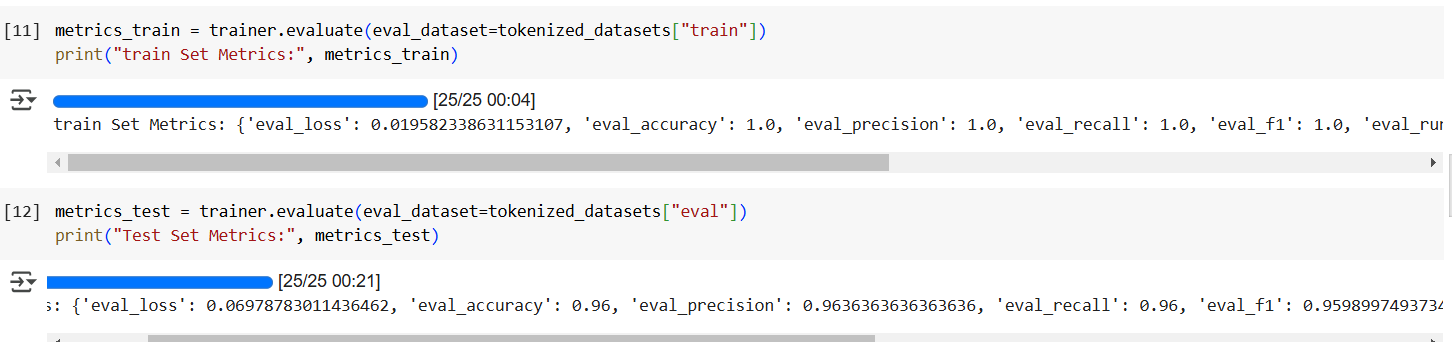

## Chunking, embedding and storing data in a vector database

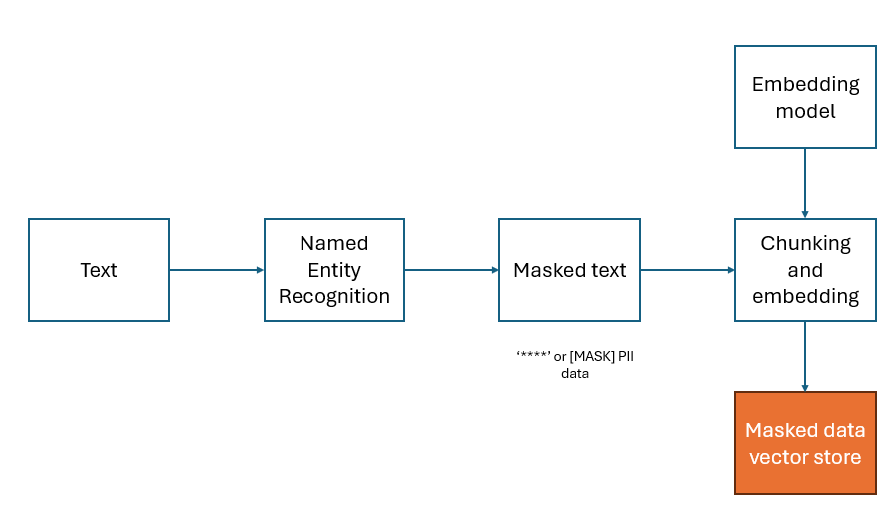

In [ ]:
# Loading the document for all 4 legal acts
doc_loader1 = SimpleDirectoryReader("/content/copyright")
documents1 = doc_loader1.load_data()

doc_loader2 = SimpleDirectoryReader("/content/divorce")
documents2 = doc_loader2.load_data()

doc_loader3 = SimpleDirectoryReader("/content/consumer_protection")
documents3 = doc_loader3.load_data()

doc_loader4 = SimpleDirectoryReader("/content/inheritance")
documents4 = doc_loader4.load_data()

# Creating a SentenceSplitter with chunk size, chunk overlap
text_splitter = SentenceSplitter(
  separator=" ",
  chunk_size=80,
  chunk_overlap=20

)

pipeline = IngestionPipeline(
    transformations=[
        text_splitter,
        embed_model
    ])

# Chunking the document
nodes1 = pipeline.run(documents=documents1)
print("Number of nodes for copyright:",len(nodes1))

nodes2 = pipeline.run(documents=documents2)
print("Number of nodes for divorce:",len(nodes2))

nodes3 = pipeline.run(documents=documents3)
print("Number of nodes for consumer protection:",len(nodes3))

nodes4 = pipeline.run(documents=documents4)
print("Number of nodes for inheritance:",len(nodes4))

# Creating an index and storing in an in-memory vectorstore
index_copyright = VectorStoreIndex(nodes1)
index_divorce = VectorStoreIndex(nodes2)
index_consumer_protection = VectorStoreIndex(nodes3)
index_inheritance = VectorStoreIndex(nodes4)

Number of nodes for copyright: 18
Number of nodes for divorce: 72
Number of nodes for consumer protection: 16
Number of nodes for inheritance: 47


## Query fusion

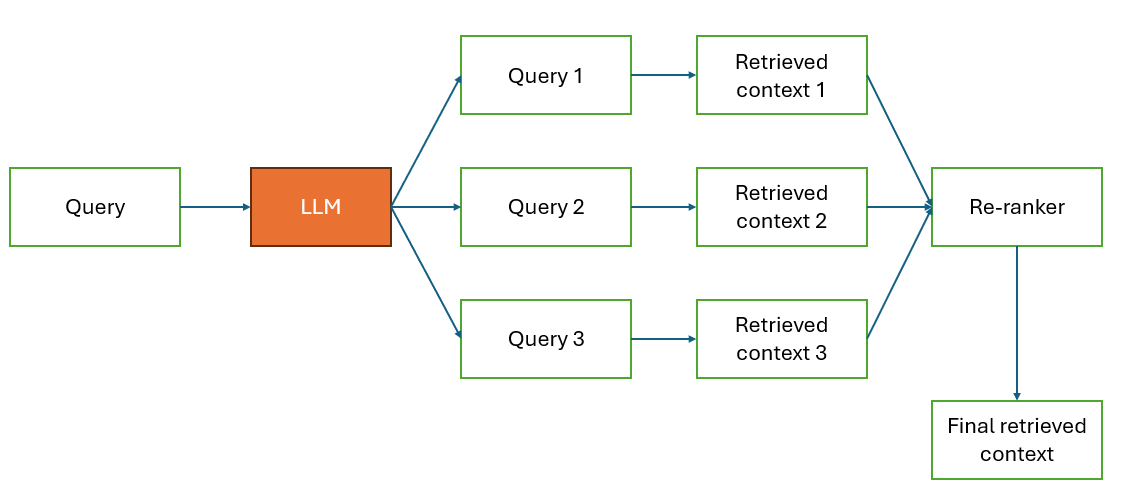

In [ ]:
# Function to generate HyDE document and perform retrieval and response generation from the LLM
def rag(user_query, index):

  retriever = QueryFusionRetriever(
    [index.as_retriever()],
    similarity_top_k=3,
    num_queries=4,  # set this to 1 to disable query generation
    use_async=True,
    verbose=True,
    )

  # using HyDE retrieval to get context and use the context to generate a response from the LLM
  query_engine = RetrieverQueryEngine.from_args(retriever)

  response = query_engine.query(user_query)

  return response, response.source_nodes

In [ ]:
# Function that uses intent to move the query to the relevant vector store
def legalRAG(intent, user_query, indexes):
  if intent == 'Copyright':
    response, source_nodes = rag(user_query, indexes[0])

  elif intent == 'Divorce':
    response, source_nodes = rag(user_query, indexes[1])

  elif intent == 'Consumer protection':
    response, source_nodes = rag(user_query, indexes[2])

  elif intent == 'Inheritance':
    response, source_nodes = rag(user_query, indexes[3])

  # if the user intent is unrelated to the 4 acts then give a generic response
  else:
    response = "Please ask questions related to Divorce act, inheritance act, consumer protection act, or copyright act"
    source_nodes = None

  return response, source_nodes

In [ ]:
indexes = [index_copyright, index_divorce, index_consumer_protection, index_inheritance]

In [ ]:
user_query = "How can I get alimony in divorce?"
intent = intent_inference(user_query, model, tokenizer, intent_label_dict)
print("Intent of the query:", intent)
response, source_nodes = legalRAG(intent, user_query, indexes)

Device set to use cuda:0


Intent of the query: Divorce
Generated queries:
Here are three search queries related to the input query:
How can I get alimony in divorce?
What are the eligibility criteria for alimony in a divorce settlement?
How do I calculate the amount of alimony I'm entitled to in a divorce?


In [ ]:
print("Response:")
response.response

Response:


'In India, divorce after a decade of marriage entitles the spouse to life-long alimony. The amount of alimony is determined by considering factors such as the age of the person entitled to receive alimony, their economic condition or earnings potential, and their health. Additionally, alimony can also be claimed by dependent children and indigent parents. The spouse seeking alimony must demonstrate that the other spouse has sufficient means to provide for their support.'

In [ ]:
for node in source_nodes:
  print(node.text)
  print("---------------")

are within the prohibited degrees of consanguinity or affinity
* In case of either party was a lunatic or idiot at the time of the marriage
* In case the former husband or wife of either party was living at the time of the solemnization,
---------------
* The couples should be separated for over a year
* The couple should able to prove that they have not been able to live together
* Matters of children’s custody,
---------------
Types of Divorce Petitions
A Christian couple can get a divorce with mutual consent (no-fault divorce or mutual divorce), or either spouse may file for divorce without the consent of the other (fault divorce) as per Indian divorce act.
---------------


In [ ]:
user_query = "How to file a complaint for damaged goods?"
intent = intent_inference(user_query, model, tokenizer, intent_label_dict)
print("Intent of the query:", intent)
response, source_nodes = legalRAG(intent, user_query, indexes)

Device set to use cuda:0


Intent of the query: Consumer protection
Generated queries:
Here are three search queries related to the input query:
How to file a complaint for damaged goods?
1. "Filing a complaint with a shipping company for damaged goods"
2. "What are the steps to file a complaint for damaged products"
3. "How to report damaged goods to the manufacturer for a refund"


In [ ]:
print("Response:")
response.response

Response:


'A consumer complaint in writing must be filed with a District Forum, along with the fee, if the goods bought by the consumer suffer from one or more defects.'

In [ ]:
for node in source_nodes:
  print(node.text)
  print("---------------")

How and When to Complain
Under the Consumer Protection Act, the customer can raise a complaint in writing if:
* Adoption of any unfair trade practise or a restrictive trade practice by any trader or service provider;
* The goods bought by him or agreed to be bought by him suffer from one or more defects;
---------------
Procedure to File Consumer Case
Any consumer complaint relating to a good or service must be filed in writing with a District Forum by the consumer along with the fee. On receipt of a complaint, the District Forum may reject or approve the complaint, usually within 21 days from the date of complaint.
---------------


In [ ]:
user_query = "Who is a legal heir?"
intent = intent_inference(user_query, model, tokenizer, intent_label_dict)
print("Intent of the query:", intent)
response, source_nodes = legalRAG(intent, user_query, indexes)

Device set to use cuda:0


Intent of the query: Inheritance
Generated queries:
Here are three search queries related to the input query "Who is a legal heir?":
Who is a legal heir in India?
What are the rules for determining a legal heir?
How do you prove legal heirship in a court of law?


In [ ]:
print("Response:")
response.response

Response:


'An individual who takes the place of the property of his/her ancestor, either by law or by a will.'

In [ ]:
for node in source_nodes:
  print(node.text)
  print("---------------")

Legal heir in India?
According to India laws, a person who is determined to succeed to the estate of an ancestor who has died without making a will or mentioning a legal heir.
---------------
Therefore a legal heir is an individual who takes the place of the property of his/her ancestor, either by law or by a will.
Importance of heir
It is essential to identify a legal heir for every person owning property; they are the successors for property claims and insurance coverage.
---------------
Legal heir under Hindu law
Under the Hindu Succession (Amendment) Act, 2005, the following can be the legal heir of a person: Class I
* Wife (Widow)
* Mother
* Son
* Daughter
* Deceased son’s daughter
* Deceased daughter’s
---------------


In [ ]:
user_query = "what is copyright infringement?"
intent = intent_inference(user_query, model, tokenizer, intent_label_dict)
print("Intent of the query:", intent)
response, source_nodes = legalRAG(intent, user_query, indexes)

Device set to use cuda:0


Intent of the query: Copyright
Generated queries:
Here are three search queries related to the input query "what is copyright infringement?":
What is the legal definition of copyright infringement?
How to identify and prevent copyright infringement in business?
What are the consequences of copyright infringement and how to avoid them?


In [ ]:
print("Response:")
response.response

Response:


'Copyright infringement of any work is a criminal offense punishable under Section 63 of the Copyright Act.'

In [ ]:
for node in source_nodes:
  print(node.text)
  print("---------------")

Remedy for copyright infringement
Copyright infringement of any work is a criminal offense punishable under Section 63 of the Copyright Act. The minimum punishment for infringement of a copyright is imprisonment for six months with a minimum fine of Rs.50,000/-.
---------------
Copyright registration is one of the key types of intellectual property protection and allows for the protection of literary, dramatic, musical and artistic works.
---------------
Copyright registration
A limited amount of copyright protection comes into existence as soon as a work is created and no formality is required to be completed for acquiring copyright.
---------------


In [ ]:
user_query = "Where to go for vacation?"
intent = intent_inference(user_query, model, tokenizer, intent_label_dict)
print("Intent of the query:", intent)
response, source_nodes = legalRAG(intent, user_query, indexes)
print("Response:")
print(response)

Device set to use cuda:0


Intent of the query: Other
Response:
Please ask questions related to Divorce act, inheritance act, consumer protection act, or copyright act


In [ ]:
source_nodes